<a href="https://colab.research.google.com/github/FerCipriani/Primeros/blob/main/IVE_Senado_T10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataSets/IVE_Senado_T10.xls")
data.head(10) # Miramos las primeras filas

,Ord,ETQ,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,25,SI,0.019667,0.266633,0.000131,0.000305,0.000234,0.002778,0.707195,0.000259,0.002389,0.000408
1,31,SI,0.000208,0.000225,0.000160,0.103102,0.000285,0.000744,0.857315,0.000315,0.037149,0.000496
2,28,SI,0.040712,0.170893,0.000130,0.017371,0.042908,0.004871,0.722238,0.000255,0.000219,0.000402
3,43,SI,0.000206,0.250464,0.000158,0.002974,0.052416,0.005950,0.678942,0.008132,0.000268,0.000491
4,26,SI,0.000092,0.457471,0.000070,0.000163,0.001283,0.009590,0.478749,0.000139,0.000119,0.052324
5,40,SI,0.000126,0.012842,0.000096,0.000224,0.000172,0.000449,0.604263,0.000190,0.092281,0.289358
6,46,SI,0.042738,0.584106,0.000215,0.000498,0.000383,0.001000,0.341302,0.000424,0.028669,0.000667
7,30,SI,0.300185,0.000176,0.000125,0.000289,0.006387,0.000581,0.689358,0.000246,0.000211,0.002442
8,19,SI,0.000098,0.001346,0.000075,0.058442,0.000134,0.000350,0.534895,0.002628,0.346011,0.056021
9,21,SI,0.239227,0.082023,0.037765,0.000230,0.006728,0.000463,0.631254,0.001834,0.000168,0.000309


In [ ]:
data.columns.values

array(['Ord', 'ETQ', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
       'T10'], dtype=object)

In [ ]:
import seaborn as sns

Modelos

In [ ]:
#librerias
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Data=data.drop(['Ord','ETQ'], axis=1) # Data son las etiquetas
Target=data.drop(['Ord','T1', 'T2','T3','T4','T5','T6','T7','T8','T9','T10'], axis=1) #Target son las variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scl = StandardScaler ()
DataST = Scl.fit_transform(Data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DataST, Target, test_size=.40, random_state = 0)

In [ ]:
Target

,ETQ
0,SI
1,SI
2,SI
3,SI
4,SI
5,SI
6,SI
7,SI
8,SI
9,SI


In [ ]:
y_train.value_counts('ETQ')

ETQ
SI    19
NO    12
dtype: int64

# 01 Arbol

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ModelTree = DecisionTreeClassifier(criterion='entropy',
                                      splitter='best',
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features=None,
                                      random_state=None,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      class_weight=None,
                                      ccp_alpha=0.0,
                                      ).fit(X_train, y_train)

In [ ]:
Imp=ModelTree.feature_importances_
print(Data.columns)
print(Imp) # Parece que Sepal.Length es nulo. Una vez que termine todo rehacemos sin esta variable

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'], dtype='object')
[0.         0.10784892 0.         0.         0.18847016 0.
 0.56967717 0.         0.13400374 0.        ]


    Modelado: 100.000


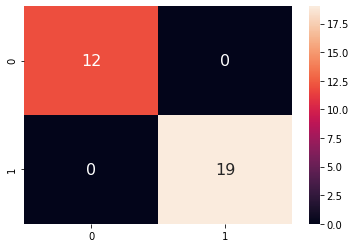

    Test    : 71.429


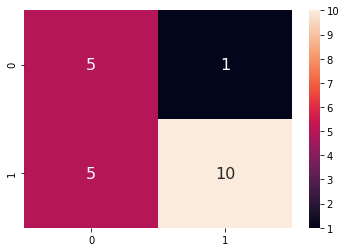

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(ModelTree.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, ModelTree.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(ModelTree.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, ModelTree.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, ModelTree.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.50      0.83      0.62         6
          SI       0.91      0.67      0.77        15

    accuracy                           0.71        21
   macro avg       0.70      0.75      0.70        21
weighted avg       0.79      0.71      0.73        21



In [ ]:
param = {'criterion':['gini','entropy'],
         #'max_features': ['auto', 'sqrt', 'log2'],
         'ccp_alpha': [0.1, .01, .001, 0],
         #'max_depth' : [5, 6, 7, 8, 9 ,10 ,11 ,12 ,15 ,20 ,30 ,40 ,50 ,70 ,90 ,120 ,150],
         'min_samples_leaf':np.arange(2,10)}


In [ ]:
ModelTree1 = GridSearchCV(DecisionTreeClassifier(), param).fit(X_train, y_train)
print(ModelTree1.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.1, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


    Modelado: 83.871


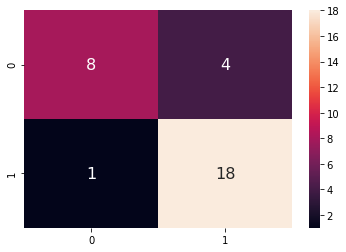

    Test    : 90.476


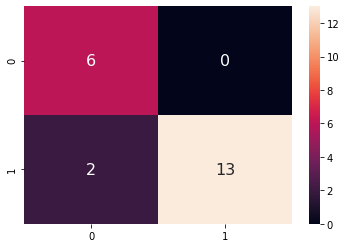

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(ModelTree1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, ModelTree1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(ModelTree1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, ModelTree1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, ModelTree1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.75      1.00      0.86         6
          SI       1.00      0.87      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.93      0.89        21
weighted avg       0.93      0.90      0.91        21



In [ ]:
import graphviz
from sklearn import tree

In [ ]:
ModelTree1=DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best').fit(X_train, y_train)

In [ ]:
dot_data = tree.export_graphviz( ModelTree1,
                                out_file=None,
                                feature_names=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
                                filled=True,
                                node_ids=True,
                                proportion=True,
                                rounded=True,)
graph = graphviz.Source(dot_data)
graph

ValueError: ignored

 # 02 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFm = RandomForestClassifier(n_estimators=500, class_weight="balanced",
                               max_features = 'sqrt', verbose=0, max_depth=6,
                               oob_score=True, random_state=50).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


    Modelado: 100.000


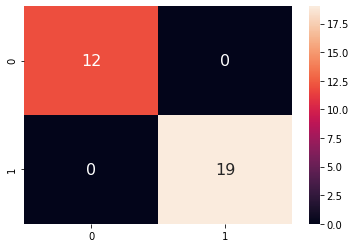

    Test    : 76.190


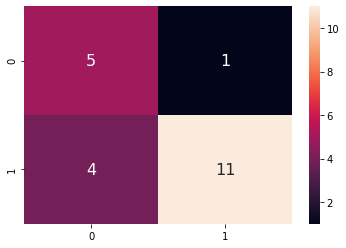

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(RFm.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, RFm.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(RFm.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, RFm.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, RFm.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.56      0.83      0.67         6
          SI       0.92      0.73      0.81        15

    accuracy                           0.76        21
   macro avg       0.74      0.78      0.74        21
weighted avg       0.81      0.76      0.77        21



In [ ]:
param_RFm = {'bootstrap': [True, False],
 'max_depth': [15, 20, 25],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [500]} #, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]} #Pongo esto en 500 por una cuestion de tiempo

In [ ]:
RFm1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RFm, cv= 5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
RFm1.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
RFm1=RandomForestClassifier(max_depth= 15,
                            bootstrap=False,
                            class_weight="balanced",
                            max_features= 'sqrt',
                            min_samples_leaf= 2,
                            min_samples_split= 15,
                            n_estimators= 500).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


    Modelado: 96.774


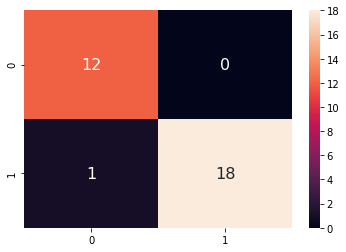

    Test    : 71.429


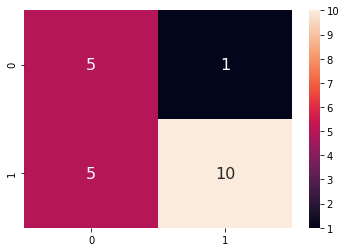

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(RFm1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, RFm1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(RFm1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, RFm1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, RFm1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.50      0.83      0.62         6
          SI       0.91      0.67      0.77        15

    accuracy                           0.71        21
   macro avg       0.70      0.75      0.70        21
weighted avg       0.79      0.71      0.73        21



 # 03 KNN Vecinos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


    Modelado: 90.323


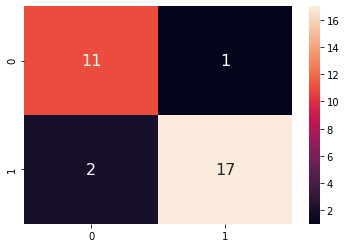

    Test    : 76.190


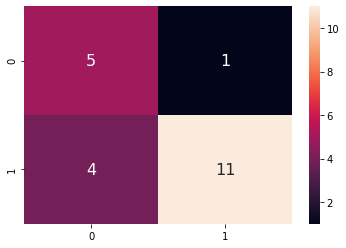

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(knn.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(knn.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.56      0.83      0.67         6
          SI       0.92      0.73      0.81        15

    accuracy                           0.76        21
   macro avg       0.74      0.78      0.74        21
weighted avg       0.81      0.76      0.77        21



In [ ]:
param_Knn = {
'n_neighbors': [2, 3, 5, 11, 19],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan'],
}

In [ ]:
cmK1 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_Knn, cv= 5).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
cmK1.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
#knn1 = KNeighborsClassifier(n_neighbors = 2, metric= 'euclidean', weights= 'distance').fit(X_train, y_train)

    Modelado: 90.323


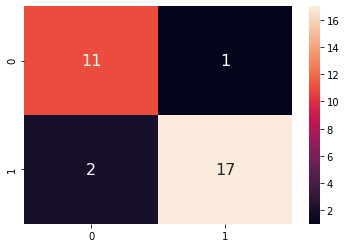

    Test    : 76.190


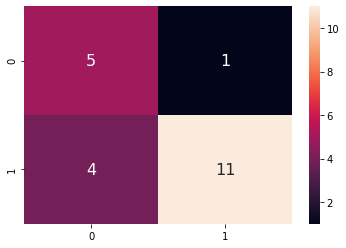

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(cmK1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, cmK1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(cmK1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, cmK1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, cmK1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.56      0.83      0.67         6
          SI       0.92      0.73      0.81        15

    accuracy                           0.76        21
   macro avg       0.74      0.78      0.74        21
weighted avg       0.81      0.76      0.77        21



 # 04 Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 87.097


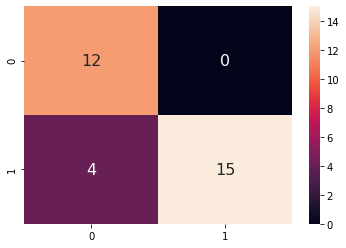

    Test    : 61.905


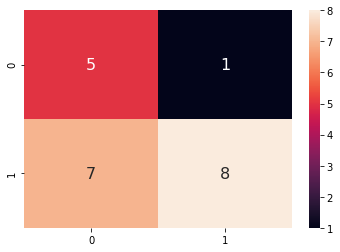

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(gnb.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, gnb.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(gnb.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.42      0.83      0.56         6
          SI       0.89      0.53      0.67        15

    accuracy                           0.62        21
   macro avg       0.65      0.68      0.61        21
weighted avg       0.75      0.62      0.63        21



In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
gnb1 = GridSearchCV(estimator=GaussianNB(),
                 param_grid=params_NB,
                 verbose=0,
                 scoring='accuracy',).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [ ]:
gnb1.best_params_

{'var_smoothing': 0.657933224657568}

    Modelado: 93.548


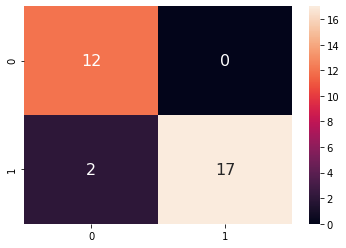

    Test    : 66.667


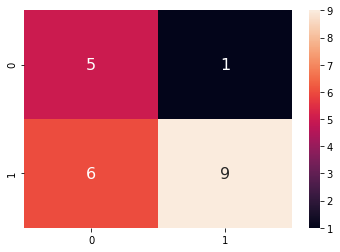

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(gnb1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, gnb1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(gnb1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, gnb1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.42      0.83      0.56         6
          SI       0.89      0.53      0.67        15

    accuracy                           0.62        21
   macro avg       0.65      0.68      0.61        21
weighted avg       0.75      0.62      0.63        21



 # 05 Boosting and AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 100.000


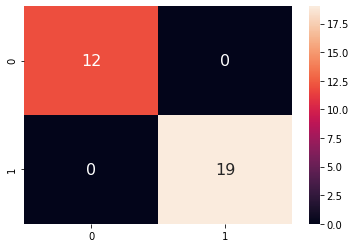

    Test    : 71.429


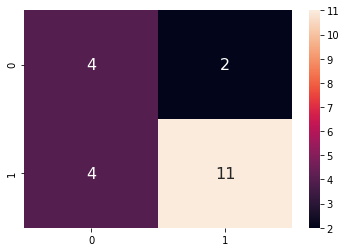

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(clf.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, clf.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(clf.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.50      0.67      0.57         6
          SI       0.85      0.73      0.79        15

    accuracy                           0.71        21
   macro avg       0.67      0.70      0.68        21
weighted avg       0.75      0.71      0.72        21



In [ ]:
param_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [ ]:
clf1 = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), parameters, verbose=0,).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

    Modelado: 100.000


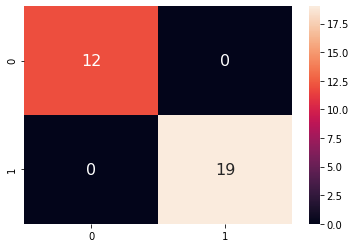

    Test    : 61.905


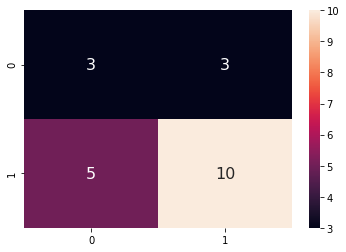

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(clf1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, clf1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(clf1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, clf1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.38      0.50      0.43         6
          SI       0.77      0.67      0.71        15

    accuracy                           0.62        21
   macro avg       0.57      0.58      0.57        21
weighted avg       0.66      0.62      0.63        21



 # 06 LDA Linear Discriminant Analysis
 https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 2).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(10, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


    Modelado: 93.548


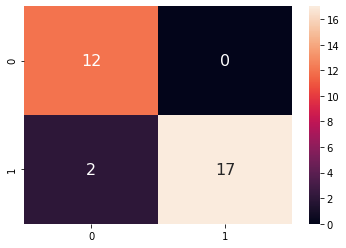

    Test    : 80.952


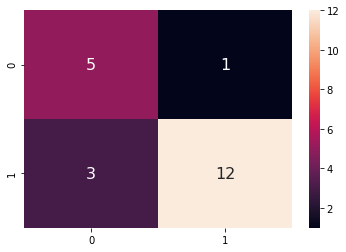

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(lda.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, lda.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(lda.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, lda.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, lda.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.62      0.83      0.71         6
          SI       0.92      0.80      0.86        15

    accuracy                           0.81        21
   macro avg       0.77      0.82      0.79        21
weighted avg       0.84      0.81      0.82        21



 # 07 MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
Mlpc = MLPClassifier(random_state=1,
                    hidden_layer_sizes=(150,100,50),
                    max_iter=300,activation = 'relu',
                    solver='adam').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Modelado: 100.000


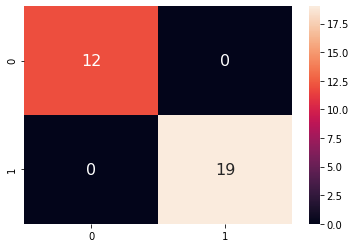

    Test    : 80.952


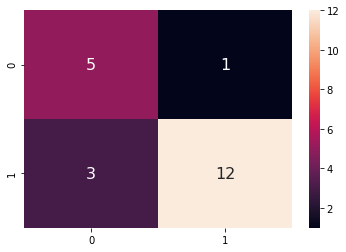

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(Mlpc.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, Mlpc.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(Mlpc.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, Mlpc.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, Mlpc.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.62      0.83      0.71         6
          SI       0.92      0.80      0.86        15

    accuracy                           0.81        21
   macro avg       0.77      0.82      0.79        21
weighted avg       0.84      0.81      0.82        21



In [ ]:
GridMlpc1={'activation': ['tanh', 'relu'],
 'alpha': [0.001, 0.05],
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['sgd', 'adam']}

In [ ]:
Mlpc1 = GridSearchCV(MLPClassifier(), GridMlpc1, n_jobs=-1, cv=3).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
Mlpc1.best_estimator_

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

    Modelado: 93.548


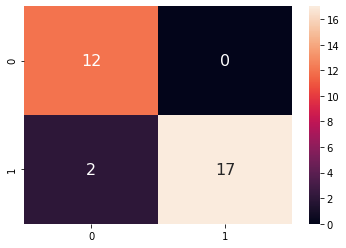

    Test    : 76.190


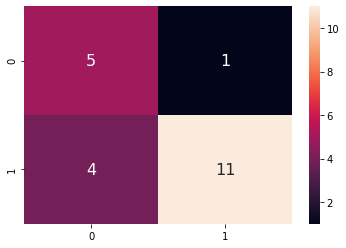

In [ ]:
print("    Modelado:", "{0:.3f}".format(100*accuracy_score(Mlpc1.predict(X_train),y_train)))
sns.heatmap(confusion_matrix(y_train, Mlpc1.predict(X_train)), annot=True, annot_kws={"size": 16})
plt.show()

print("    Test    :", "{0:.3f}".format(100*accuracy_score(Mlpc1.predict(X_test),y_test)))
sns.heatmap(confusion_matrix(y_test, Mlpc1.predict(X_test)), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test, Mlpc1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.56      0.83      0.67         6
          SI       0.92      0.73      0.81        15

    accuracy                           0.76        21
   macro avg       0.74      0.78      0.74        21
weighted avg       0.81      0.76      0.77        21



In [ ]:
Mlpc1.best_score_

0.9363636363636364

# 08 Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
mSVC = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True).fit(X_train, y_train)

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Train score of trained model: 100.000


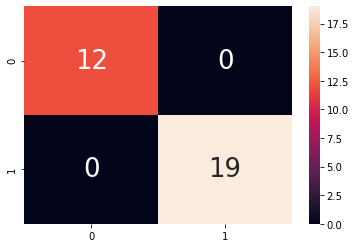

    Test score of trained model:  71.429


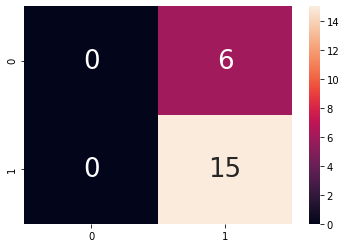

In [ ]:
print("    Train score of trained model:", "{0:.3f}".format(100*mSVC.score(X_train, y_train)))
sns.heatmap(confusion_matrix(y_train, mSVC.predict(X_train)), annot=True, annot_kws={"size": 26})
plt.show()

print("    Test score of trained model: ", "{0:.3f}".format(100*mSVC.score(X_test, y_test)))
sns.heatmap(confusion_matrix(y_test, mSVC.predict(X_test)), annot=True, annot_kws={"size": 26})
plt.show()

In [ ]:
print(classification_report(y_test, mSVC.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.00      0.00      0.00         6
          SI       0.71      1.00      0.83        15

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly','sigmoid'],
              'shrinking': [True, False],
              'degree': [1,2,3],
              'probability': [True, False],
              'verbose': [True, False],}

In [ ]:
mSVC1 = GridSearchCV(mSVC, param, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 13384 tasks      | elapsed:   45.0s


[LibSVM]

[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:   48.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f'GridSearchView Best Estimator: {mSVC1.best_estimator_}')

GridSearchView Best Estimator: SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=10, kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)


    Train score of trained model: 87.097


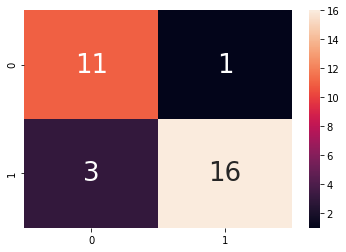

    Test score of trained model:  71.429


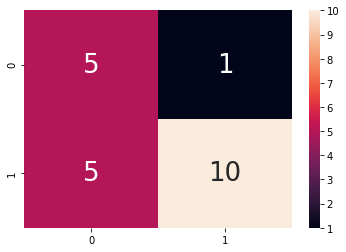

In [ ]:
print("    Train score of trained model:", "{0:.3f}".format(100*mSVC1.score(X_train, y_train)))
sns.heatmap(confusion_matrix(y_train, mSVC1.predict(X_train)), annot=True, annot_kws={"size": 26})
plt.show()

print("    Test score of trained model: ", "{0:.3f}".format(100*mSVC1.score(X_test, y_test)))
sns.heatmap(confusion_matrix(y_test, mSVC1.predict(X_test)), annot=True, annot_kws={"size": 26})
plt.show()

In [ ]:
print(classification_report(y_test, mSVC1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.50      0.83      0.62         6
          SI       0.91      0.67      0.77        15

    accuracy                           0.71        21
   macro avg       0.70      0.75      0.70        21
weighted avg       0.79      0.71      0.73        21



In [ ]:
print(f'GridSearchView Best Score: {mSVC1.best_score_*100}')

GridSearchView Best Score: 87.14285714285715


 # 09 Keras

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
TargetEnc = LabelEncoder().fit_transform(Target) # transformo las categorías a Nros

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
TargetEnc1 = pd.get_dummies(TargetEnc).values

In [ ]:
TargetEnc1

In [ ]:
DataST.reshape(-1,1)

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(DataST, TargetEnc1, test_size=0.25, random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
model = Sequential()
model.add(Dense(10,input_shape=(10,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_85 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_86 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 18        
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test_class = np.argmax(y_test,axis=1) # paso de tres columnas a una columna para poder comparar
y_pred_class = np.argmax(y_pred,axis=1) # y_pred me da una matriz de probabilidades, con argmax hago 1 el mayor

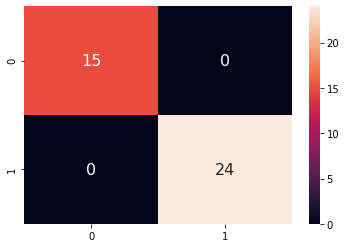

In [ ]:
sns.heatmap(confusion_matrix(np.argmax(y_train,axis=1),  np.argmax(model.predict(X_train),axis=1)), annot=True, annot_kws={"size": 16})
plt.show()

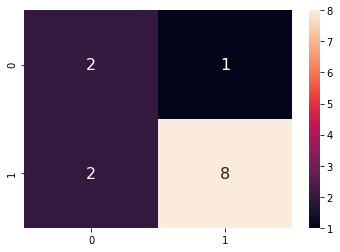

In [ ]:
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.89      0.80      0.84        10

    accuracy                           0.77        13
   macro avg       0.69      0.73      0.71        13
weighted avg       0.80      0.77      0.78        13



 # Extra: PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
DataST = Scl.fit_transform(Data)
pca = PCA(n_components=5)
X_new = pca.fit_transform(DataST)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.19002981, 0.12905206, 0.11643438, 0.11141149, 0.10737745])